In [1]:
# This code simulates simple Lorenz Chaos simulator
# This code is a follow through of the channel ("https://www.youtube.com/@MachineLearningSimulation")

In [2]:
# IMPORTING ALL THE DEPENDENCIES
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# DEFINE A FUNCTION TO EVALUATE THE RHS
def lorenz_rhs(u,*,sigma, rho, beta):
    x, y ,z = u
    x_dot = sigma * (y-x)
    y_dot = x * (rho - z) - y
    z_dot = x * y - beta *z
    u_dot = np.array([x_dot, y_dot, z_dot])
    return u_dot

In [12]:
lorenz_rhs(np.ones([3]), sigma=1,rho = 2, beta = 3) # Just checking calling function

array([ 0.,  0., -2.])

In [13]:
#CREATE A CLASS TO INTEGRATE WITH RUNGE-KUTTA-4 METHOD
class LorenzStepperRK4:
    def __init__(self,dt=0.01,*,sigma=10, rho = 28, beta =8/3):
        self.dt = dt
        self.sigma = sigma
        self.rho = rho
        self.beta = beta

    def __call__(self, u_prev):
        lorenz_rhs_fixed = lambda u : lorenz_rhs( u , sigma=self.sigma, rho = self.rho, beta=self.beta)
        
        k_1 = lorenz_rhs_fixed(u_prev)
        k_2 = lorenz_rhs_fixed(u_prev + 0.5*self.dt * k_1)
        k_3 = lorenz_rhs_fixed(u_prev + 0.5* self.dt * k_2)
        k_4 = lorenz_rhs_fixed(u_prev + self.dt * k_3)
        u_next = u_prev + self.dt * (k_1 + 2*k_2 + 2*k_3 + k_4)/6
        return u_next
    




In [14]:
# OBJECT OF THE CLASS
lorenz_stepper = LorenzStepperRK4()

In [15]:
# INITIAL CONDITION
u_0 = np.ones(3)

In [16]:
# 1ST RESULT AFTER TIME STEPPING ONCE
lorenz_stepper(u_0)

array([1.01256719, 1.2599178 , 0.98489097])

In [17]:
# VARIABLE TO STORE ALL THE RESULTS
trj = [u_0,]
u_current = u_0

for i in range(5000):
    u_current = lorenz_stepper(u_current)
    trj.append(u_current)
trj = np.array(trj)

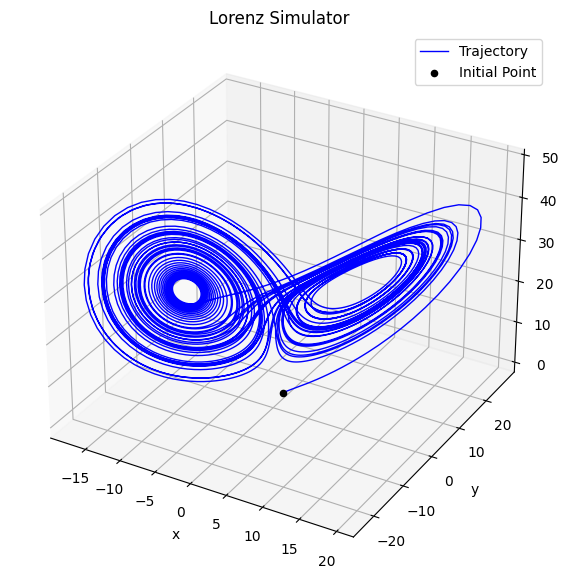

In [19]:
# PLOTTING COMMANDS
fig, ax = plt.subplots(subplot_kw = {"projection":"3d" },
                       figsize = (7,7))
ax.plot(trj[:,0],trj[:,1],trj[:,2],lw=1.0,color = "blue",label = "Trajectory")
ax.scatter3D(trj[0,0],trj[0,1],trj[0,2],color = "black", label ="Initial Point")

ax. set_xlabel("x")
ax. set_ylabel("y")
ax. set_zlabel("z")
plt.title("Lorenz Simulator")

plt.legend()

